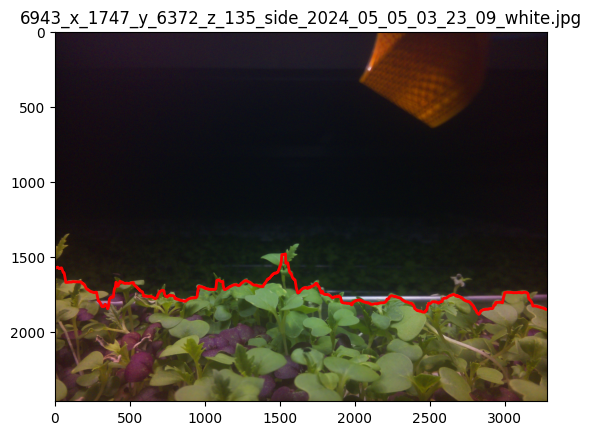

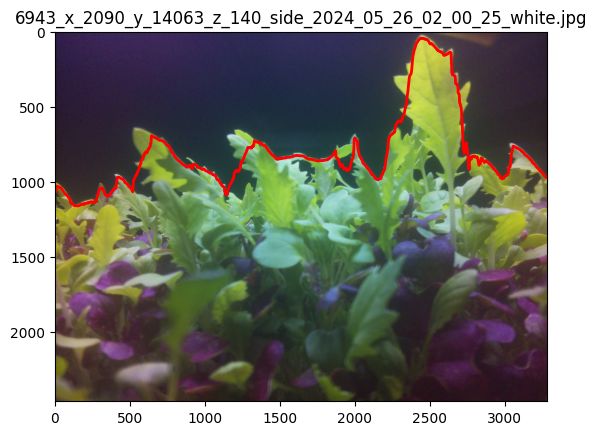

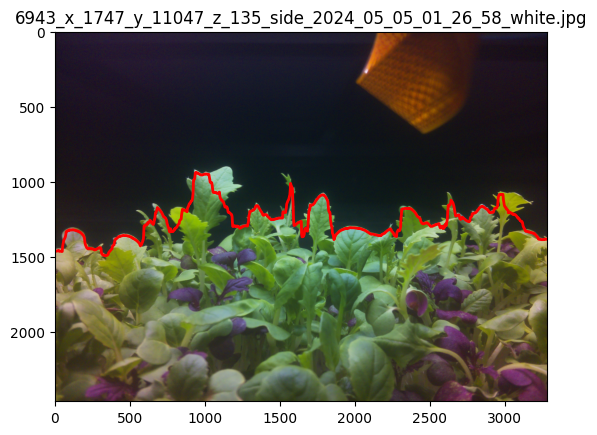

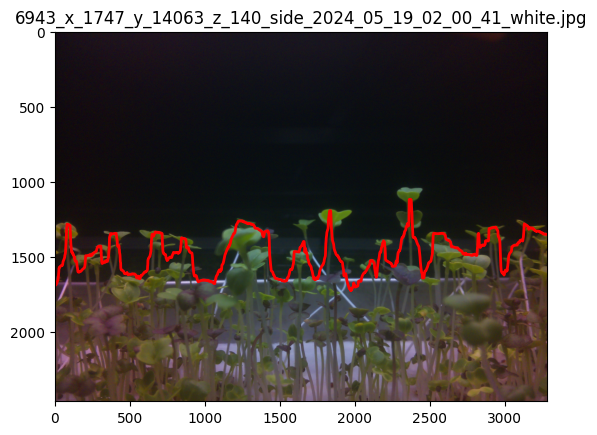

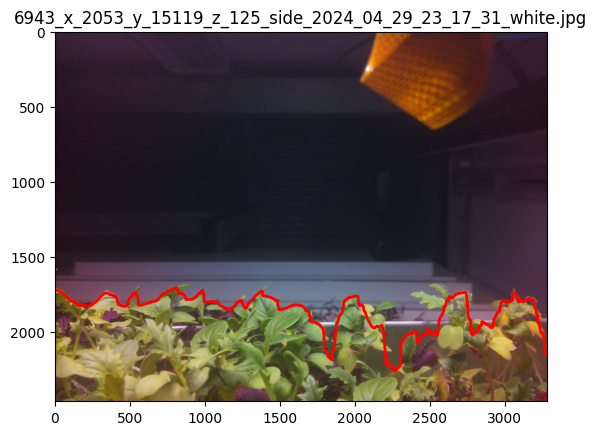

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

# Define paths
images_folder = 'brispi/side_images' 
height_arrays_folder = 'height_arrays'

# List all height array files
height_array_files = [f for f in os.listdir(height_arrays_folder) if f.endswith('.npy')]

# Plot height arrays on top of the corresponding images
for height_array_file in height_array_files:
    image_name = os.path.splitext(height_array_file)[0] + '.jpg'
    image_path = os.path.join(images_folder, image_name)
    
    if os.path.exists(image_path):
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read the image at {image_path}. Skipping...")
            continue
        
        # Load the height array
        height_array_path = os.path.join(height_arrays_folder, height_array_file)
        height_array = np.load(height_array_path)
        
        # Mirror the height array vertically
        height_array = image.shape[0] - height_array
        
        # Plot the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(image_name)
        
        # Plot the height array on top of the image
        plt.plot(height_array, color='red', linewidth=2)
        
        # Show the plot
        plt.show()
    else:
        print(f"Image {image_name} not found in {images_folder}. Skipping...")

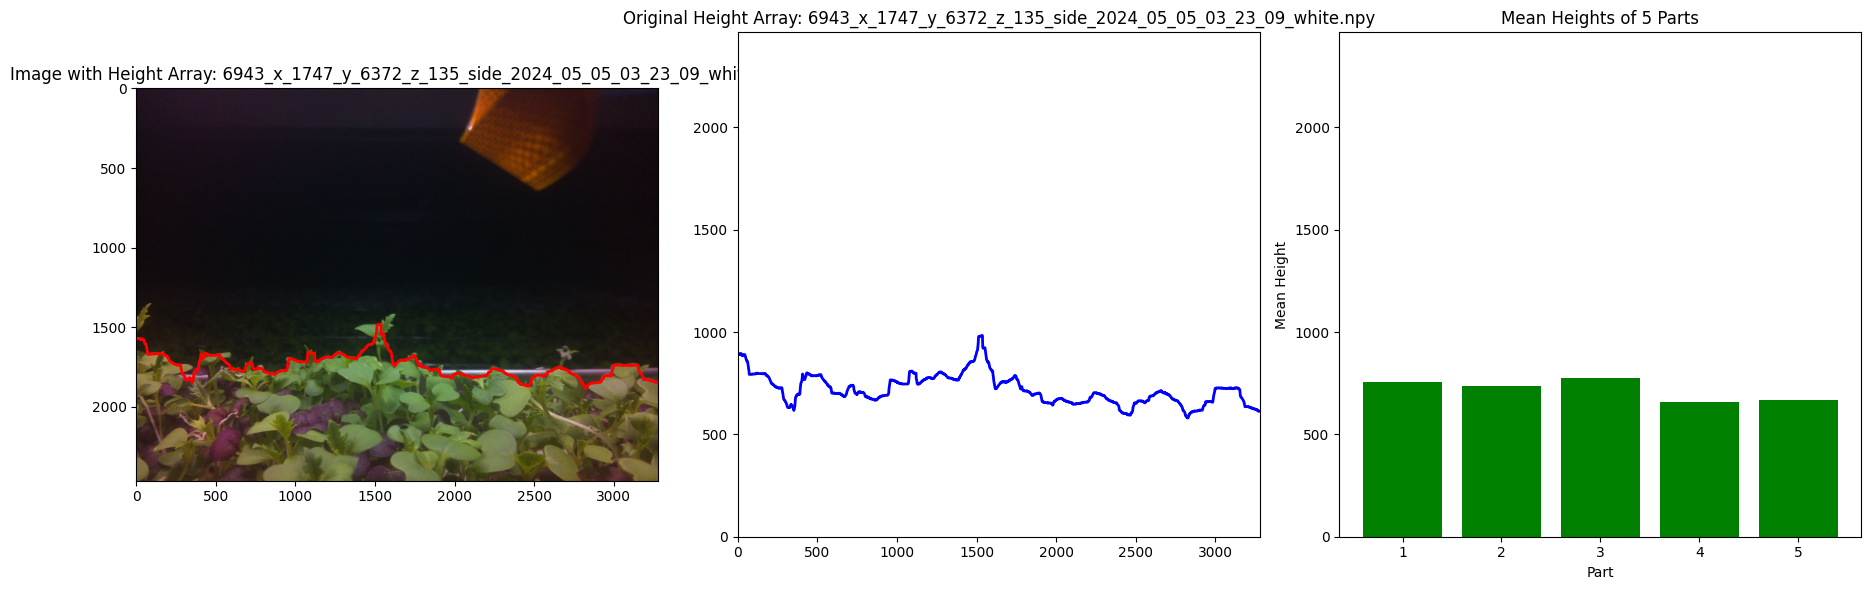

Overall Mean Height: 719.05


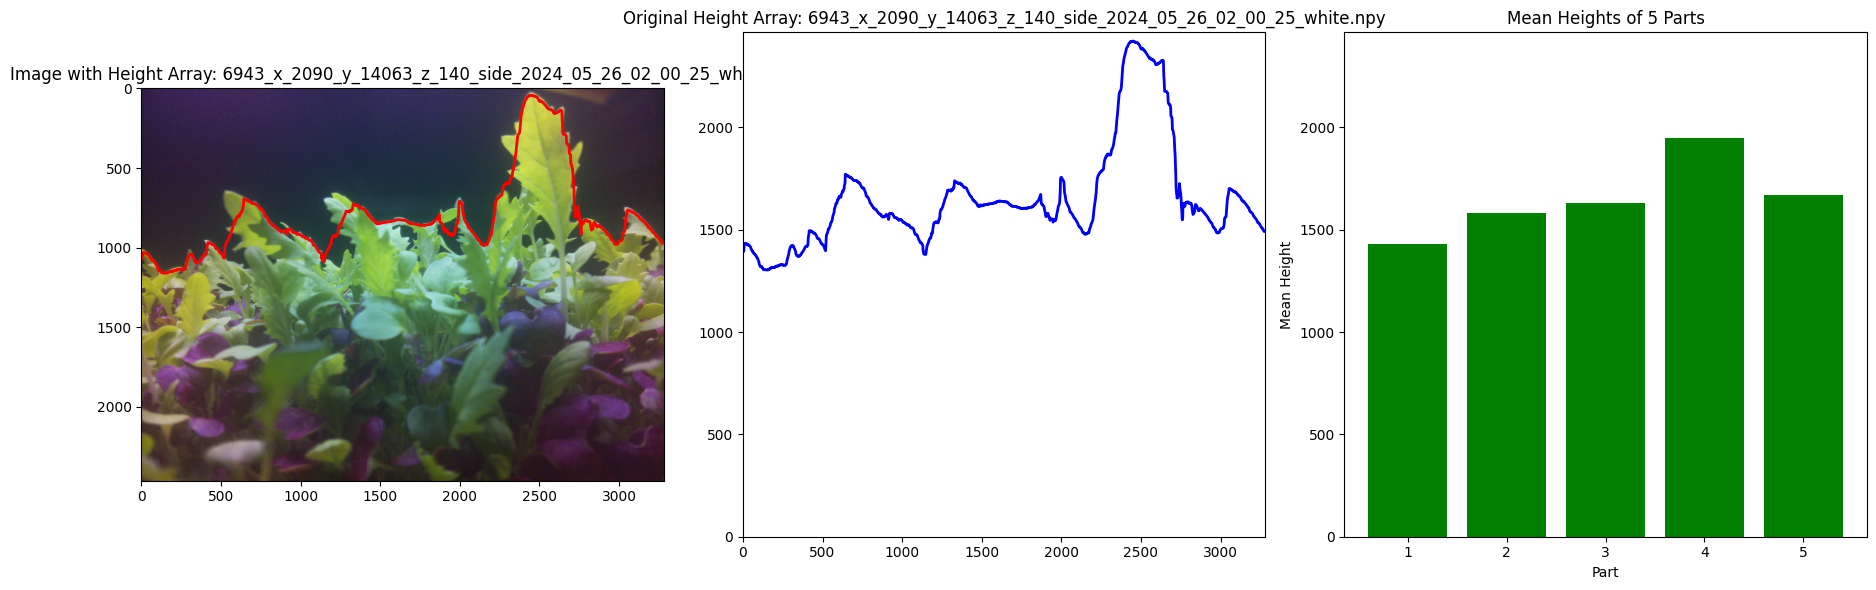

Overall Mean Height: 1653.40


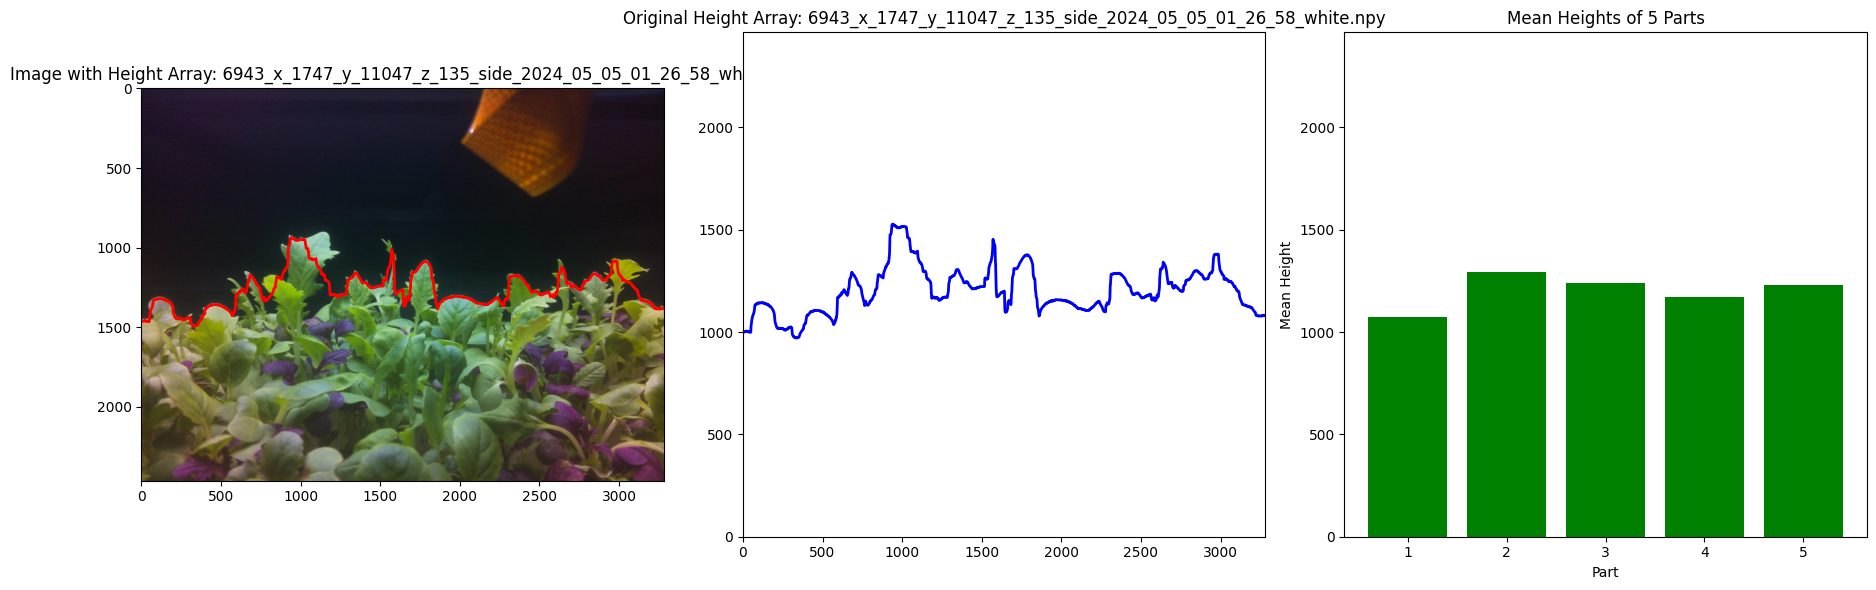

Overall Mean Height: 1201.98


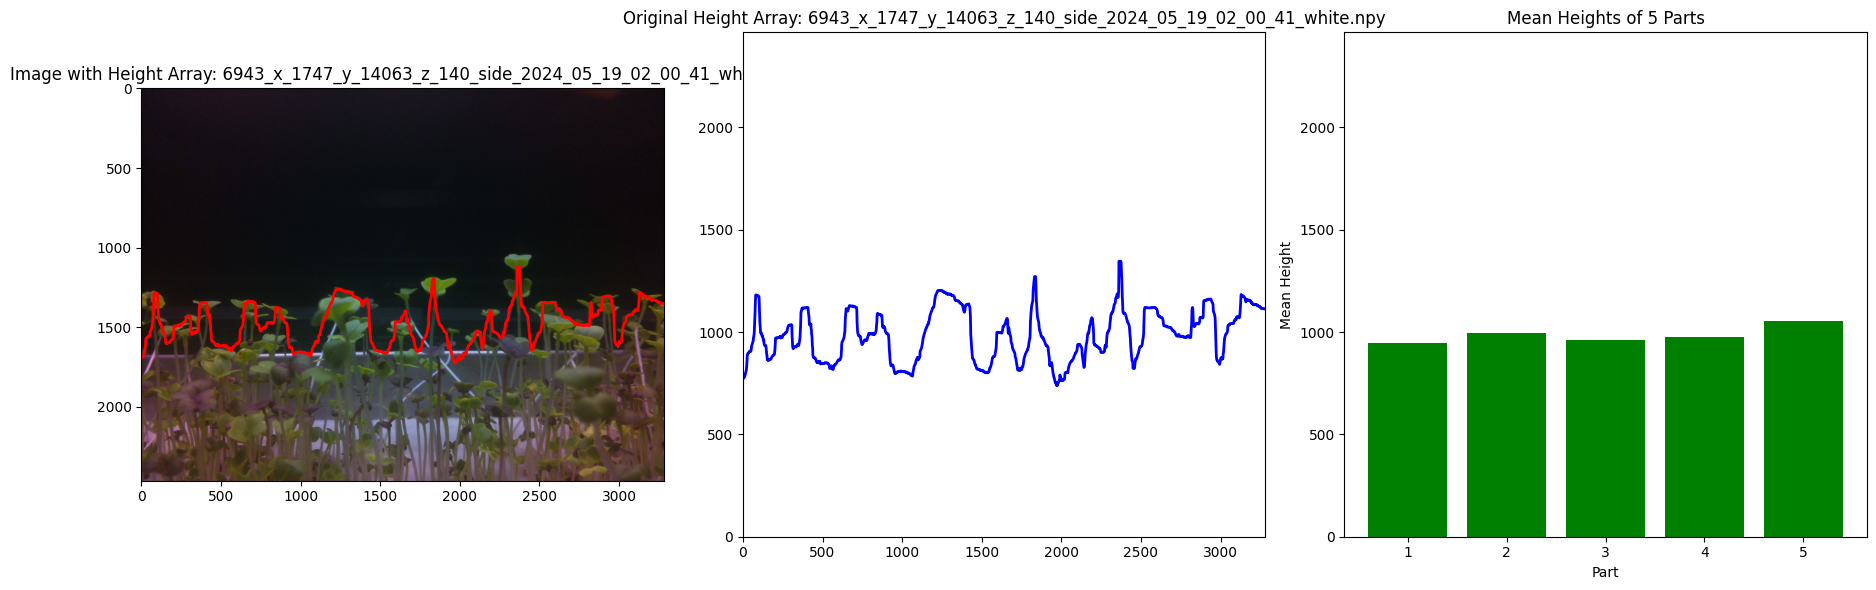

Overall Mean Height: 986.11


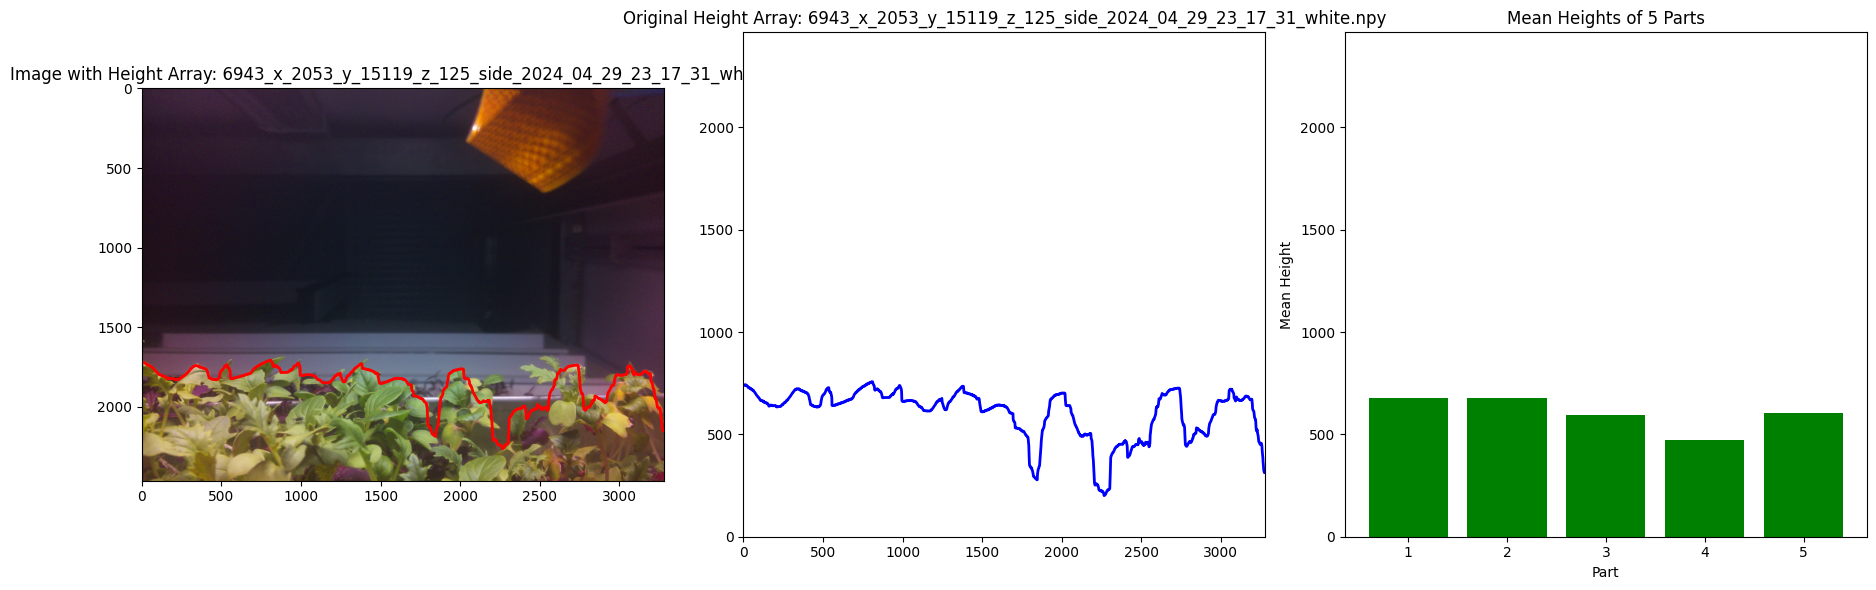

Overall Mean Height: 605.19


In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

# Define paths
images_folder = 'brispi/side_images'
height_arrays_folder = 'height_arrays'

# List all height array files
height_array_files = [f for f in os.listdir(height_arrays_folder) if f.endswith('.npy')]

# Function to calculate mean heights for parts
def calculate_mean_heights(height_array, parts=5):
    part_size = len(height_array) // parts
    mean_heights = []
    for i in range(parts):
        part = height_array[i * part_size:(i + 1) * part_size]
        mean_heights.append(np.mean(part))
    return mean_heights

# Function to calculate overall mean height
def calculate_overall_mean_height(height_array):
    return np.mean(height_array)

# Plot height arrays on top of the corresponding images
for height_array_file in height_array_files:
    image_name = os.path.splitext(height_array_file)[0] + '.jpg'
    image_path = os.path.join(images_folder, image_name)
    
    if os.path.exists(image_path):
        # Load the image
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to read the image at {image_path}. Skipping...")
            continue
        
        # Load the height array
        height_array_path = os.path.join(height_arrays_folder, height_array_file)
        height_array = np.load(height_array_path)
        
        # Mirror the height array vertically
        mirrored_height_array = image.shape[0] - height_array
        
        # Calculate mean heights for the 5 parts
        mean_heights = calculate_mean_heights(height_array, parts=5)
        
        # Calculate overall mean height
        overall_mean_height = calculate_overall_mean_height(height_array)
        
        # Create a figure with three subplots
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
        
        # Plot the image with the mirrored height array
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax1.plot(mirrored_height_array, color='red', linewidth=2)
        ax1.set_title(f"Image with Height Array: {image_name}")
        ax1.set_xlim([0, image.shape[1]])
        ax1.set_ylim([image.shape[0], 0])  # Invert y-axis to match image coordinates
        
        # Plot the original height array
        ax2.plot(height_array, color='blue', linewidth=2)
        ax2.set_title(f"Original Height Array: {os.path.splitext(image_name)[0]}.npy")
        ax2.set_xlim([0, len(height_array)])
        ax2.set_ylim([0, image.shape[0]])
        
        # Plot the mean heights for the 5 parts
        ax3.bar(range(1, 6), mean_heights, color='green')
        ax3.set_title("Mean Heights of 5 Parts")
        ax3.set_xlabel("Part")
        ax3.set_ylabel("Mean Height")
        ax3.set_xticks(range(1, 6))
        ax3.set_ylim([0, image.shape[0]])  # Add some space above the highest bar
        
        # Show the plots
        plt.tight_layout()
        plt.show()
        
        # Print overall mean height
        print(f"Overall Mean Height: {overall_mean_height:.2f}")
    else:
        print(f"Image {image_name} not found in {images_folder}. Skipping...")
